# RACING MOTORSPORTS & FORMULA 1 - DRIVERS ANALYSIS

## Descripción del Proyecto

Al aprovechar `técnicas de análisis de datos`, profundizaremos en datos históricos para descubrir información valiosa sobre la historia de la máxima categoría del automovilismo, el perfil de los pilotos y la evolución del deporte a lo largo del tiempo. Este enfoque nos permitirá identificar patrones, tendencias e indicadores clave de rendimiento que pueden resaltar áreas de fortaleza o mejora tanto para los pilotos como para los equipos. Además, los conocimientos obtenidos proporcionarán una ventaja competitiva al informar los procesos de toma de decisiones, optimizar estrategias y predecir resultados futuros, contribuyendo en última instancia a un enfoque más basado en datos para entender la dinámica del deporte.

## Objetivos

- `Identificar` qué países han aportado la mayor cantidad de pilotos a la Fórmula 1 a lo largo de la historia. Esto permitirá reconocer las regiones con más tradición en el automovilismo y comprender qué contextos culturales o deportivos favorecen la formación de pilotos.
- `Analizar` la evolución en la representación de los países a lo largo de las décadas, identificando si existen tendencias o cambios significativos en el origen de los pilotos con el tiempo.
- `Determinar` si la nacionalidad de los pilotos tiene algún impacto en su desempeño o en la duración de sus carreras en la Fórmula 1, brindando una perspectiva más profunda sobre los factores que influyen en el éxito en este deporte.

## 1. ABRIR Y LEER LOS DATOS

In [74]:
# Importar las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [75]:
# Read the file
dataset = pd.read_csv('drivers.csv')

In [76]:
# Comprobar la informacion
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     860 non-null    int64 
 1   driverRef    860 non-null    object
 2   Number       860 non-null    object
 3   Code         860 non-null    object
 4   Forename     860 non-null    object
 5   Surname      860 non-null    object
 6   DOB          860 non-null    object
 7   Nationality  860 non-null    object
 8   URL          860 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.6+ KB


## 2. PREPARAR LOS DATOS

In [77]:
# Cambiar los nombre de las columnas a 'lower case'
dataset.columns = dataset.columns.str.lower()
dataset.columns

Index(['driverid', 'driverref', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [78]:
# Renombrar algunas columnas
dataset.rename(columns={'driverid': 'driver_id'}, inplace=True)
dataset.rename(columns={'driverref': 'driver_ref'}, inplace=True)

In [79]:
# Convertir la columna 'dob' al tipo datetime
dataset['dob'] = pd.to_datetime(dataset['dob'], errors='coerce', dayfirst=True)

In [80]:
# Explorar la informacion
dataset.head()

,driver_id,driver_ref,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [81]:
# Reemplazar algunos valores
dataset['number'] = dataset['number'].replace('\\N', 'N/A')

In [82]:
# Comprobar los cambios
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   driver_id    860 non-null    int64         
 1   driver_ref   860 non-null    object        
 2   number       860 non-null    object        
 3   code         860 non-null    object        
 4   forename     860 non-null    object        
 5   surname      860 non-null    object        
 6   dob          853 non-null    datetime64[ns]
 7   nationality  860 non-null    object        
 8   url          860 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 60.6+ KB


In [83]:
# Verificar el numero de filas y columnas
dataset.shape

(860, 9)

## 3. EDA - EXPLORATORY DATA ANALYSIS

In [84]:
# Comprobar fecha min y max del dataset
min_date = dataset['dob'].min()
max_date = dataset['dob'].max()

print(f"Fecha mínima: {min_date.strftime('%d-%m-%Y')}")
print(f"Fecha máxima: {max_date.strftime('%d-%m-%Y')}")



Fecha mínima: 29-03-1900
Fecha máxima: 08-05-2005


In [85]:
# Visualizar informacion de la fecha minima
min_date = dataset[dataset['dob'] == '29-03-1900']
min_date

,driver_id,driver_ref,number,code,forename,surname,dob,nationality,url
749,749,aston,N/A,\N,Bill,Aston,1900-03-29,British,http://en.wikipedia.org/wiki/Bill_Aston


In [86]:
# Visualizar informacion de fecha maxima
max_date = dataset[dataset['dob'] == '2005-05-08']
max_date

,driver_id,driver_ref,number,code,forename,surname,dob,nationality,url
858,860,bearman,38,BEA,Oliver,Bearman,2005-05-08,British,http://en.wikipedia.org/wiki/Oliver_Bearman


In [87]:
# Conteo de las nacionalidades de los pilotos
counts = dataset['nationality'].value_counts(ascending=False)
counts

nationality
British              166
American             158
Italian               99
French                73
German                50
Brazilian             32
Argentine             24
Belgian               23
Swiss                 23
South African         23
Japanese              20
Australian            18
Dutch                 18
Spanish               15
Austrian              15
Canadian              14
Swedish               10
New Zealander         10
Finnish                9
Mexican                6
Danish                 5
Irish                  5
Rhodesian              4
Portuguese             4
Russian                4
Monegasque             4
Uruguayan              4
Colombian              3
Venezuelan             3
East German            3
Thai                   2
Indian                 2
Indonesian             1
Chinese                1
Argentine-Italian      1
Czech                  1
American-Italian       1
Liechtensteiner        1
Chilean                1
Malaysian    

### 3.1 Top 20 Nacionalidades en la Historia del Automovilismo

In [88]:
# Top 20 nacionalidades de pilotos
counts = dataset['nationality'].value_counts(ascending=False)
counts.head(20)

nationality
British          166
American         158
Italian           99
French            73
German            50
Brazilian         32
Argentine         24
Belgian           23
Swiss             23
South African     23
Japanese          20
Australian        18
Dutch             18
Spanish           15
Austrian          15
Canadian          14
Swedish           10
New Zealander     10
Finnish            9
Mexican            6
Name: count, dtype: int64

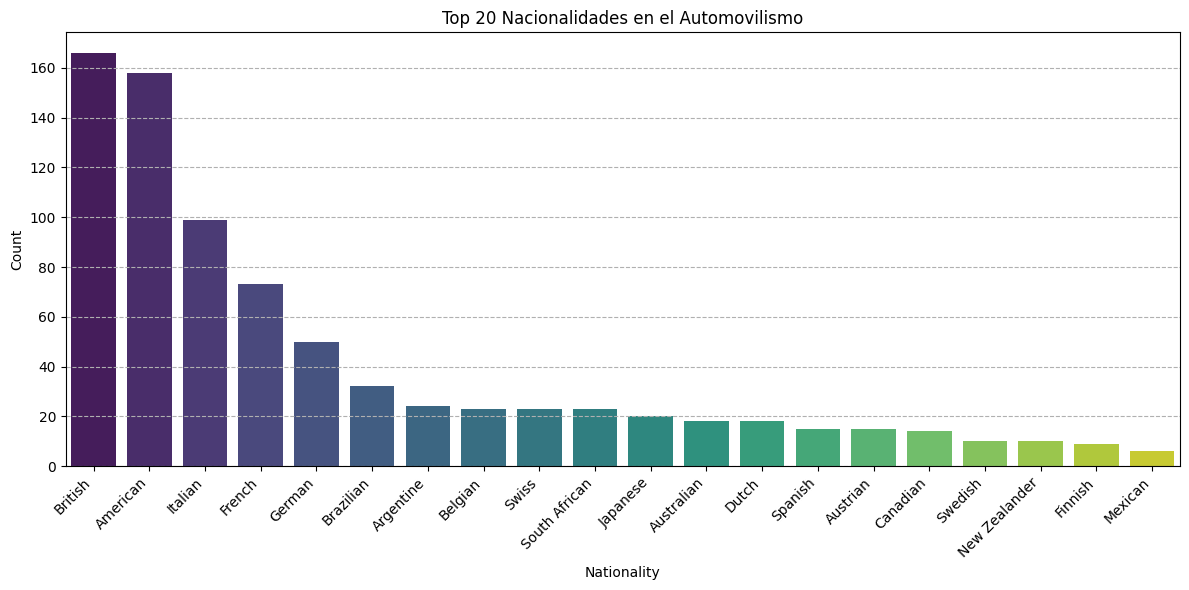

In [89]:
# Contar las nacionalidades y obtener las 20 más frecuentes
counts = dataset['nationality'].value_counts(ascending=False).head(20)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Formato al gráfico
plt.title('Top 20 Nacionalidades en el Automovilismo')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### 3.2 Últimos 20 Pilotos Británicos en Fórmula 1

In [90]:
# Filtrar el DataFrame por nacionalidad
british_drivers = dataset[dataset['nationality'] == 'British']

# Ordenar los resultados por nacimiento (dob) 
british_drivers_sorted = british_drivers.sort_values(by='dob', ascending=False)

# Seleccionar solo la columna 'driver_ref' para mostrar
british = british_drivers_sorted['driver_ref']

# Mostrar los nombres de los pilotos
british.head(20)


858          bearman
844           norris
845          russell
849           aitken
828          stevens
819          chilton
834    jolyon_palmer
813            resta
0           hamilton
17            button
18          davidson
50            wilson
13         coulthard
65            mcnish
86          blundell
55            irvine
64           herbert
150         donnelly
140           bailey
134         mccarthy
Name: driver_ref, dtype: object

### 3.3 Últimos 20 Pilotos Americanos en Fórmula 1

In [91]:
# Filtrar el DataFrame por nacionalidad
american_drivers = dataset[dataset['nationality'] == 'American']

# Ordenar los resultados por nacimiento (dob)
american_drivers_sorted = american_drivers.sort_values(by='dob', ascending=False)

# Seleccionar solo la columna 'driver_ref' para mostrar
american = american_drivers_sorted['driver_ref']

# Mostrar los nombres de los pilotos
american.head(20)

856          sargeant
833             rossi
25              speed
120          andretti
157           cheever
213             cogan
248             rahal
192          sullivan
238            lunger
451           monarch
343             posey
392         tom_jones
391            fisher
239            ongais
206    mario_andretti
308            revson
470             mayer
365         hutchison
287           donohue
468            penske
Name: driver_ref, dtype: object

### 3.4 Últimos 20 Pilotos Italianos en Fórmula 1

In [92]:
# Filtrar el DataFrame por nacionalidad
italian_drivers = dataset[dataset['nationality'] == 'Italian']

# Ordenar los resultados por nacimiento (dob) 
italian_drivers_sorted = italian_drivers.sort_values(by='dob', ascending=False)

# Seleccionar solo la columna 'driver_ref' para mostrar
italian = italian_drivers_sorted['driver_ref']

# Mostrar los nombres de los pilotos
italian.head(20)

840       giovinazzi
45             bruni
23            liuzzi
44           pantano
14            trulli
20        fisichella
68            badoer
96             papis
124         naspetti
80        morbidelli
92     schiattarella
69           zanardi
79           sospiri
123         apicella
133        bertaggia
84        montermini
77            larini
132            caffi
121          capelli
130           modena
Name: driver_ref, dtype: object

### 3.5 Últimos 20 Pilotos Franceses en Fórmula 1

In [93]:
# Filtrar el DataFrame por nacionalidad
french_drivers = dataset[dataset['nationality'] == 'French']

# Ordenar los resultados por nacimiento (dob)
french_drivers_sorted = french_drivers.sort_values(by='dob', ascending=False)

# Seleccionar solo la columna 'driver_ref' para mostrar
french = french_drivers_sorted['driver_ref']

# Mostrar los nombres de los pilotos
french.head(20)

838             ocon
452            gasly
817           vergne
818              pic
823    jules_bianchi
153         grosjean
6           bourdais
35          montagny
71          sarrazin
95          boullion
115          lagorce
43             panis
102          bernard
54             alesi
99             comas
107         belmondo
110           gounon
113           dalmas
161         raphanel
168            fabre
Name: driver_ref, dtype: object

### 3.6 Últimos 20 Pilotos Alemanes en Fórmula 1

In [94]:
# Filtrar el DataFrame por nacionalidad
german_drivers = dataset[dataset['nationality'] == 'German']

# Ordenar los resultados por nacimiento (dob) 
german_drivers_sorted = german_drivers.sort_values(by='dob', ascending=False)

# Seleccionar solo la columna 'driver_ref' para mostrar
german = german_drivers_sorted['driver_ref']

# Mostrar los nombres de los pilotos
german.head(20)

852       mick_schumacher
835              wehrlein
807            hulkenberg
19                 vettel
2                 rosberg
15                  sutil
9                   glock
826              lotterer
27      markus_winkelhock
1                heidfeld
22        ralf_schumacher
29     michael_schumacher
142               bartels
48               frentzen
145             schneider
160               weidler
163    joachim_winkelhock
156                danner
184                bellof
180    manfred_winkelhock
Name: driver_ref, dtype: object

### 3.7 Últimos Pilotos Mexicanos en Fórmula 1

In [95]:
# Filtrar el DataFrame por nacionalidad
mexican_drivers = dataset[dataset['nationality'] == 'Mexican']

# Ordenar los resultados por nacimiento (dob) 
mexican_drivers_sorted = mexican_drivers.sort_values(by='dob', ascending=False)

# Seleccionar solo la columna 'driver_ref' para mostrar
mexican = mexican_drivers_sorted['driver_ref']

# Mostrar los nombres de los corredores británicos ordenados
mexican.head(20)

820            gutierrez
814                perez
211              rebaque
454    ricardo_rodriguez
344            rodriguez
381               solana
Name: driver_ref, dtype: object

### 3.8 Establecer Rangos de Fechas

La máxima categoría del automovilismo, conocida como `Formula 1` tuvo su origen formalmente hasta el año 1950. Por esa razón, vamos a hacer un análisis de los años previos del Automovilismo vs el año de origen de la Fórmula 1 en adelante para conocer algunos datos y obtener una perspectiva más clara de la evolución del deporte a partir de este hito importante. 

In [96]:
# Convertir la columna 'dob' a tipo datetime
dataset['dob'] = pd.to_datetime(dataset['dob'], errors='coerce')

# Contar pilotos por rango de años
count_1900_1949 = dataset[(dataset['dob'].dt.year >= 1900) & (dataset['dob'].dt.year <= 1949)].shape[0]
count_1950_2005 = dataset[(dataset['dob'].dt.year >= 1936) & (dataset['dob'].dt.year <= 2005)].shape[0]

# Mostrar los resultados
print(f'Pilotos nacidos entre 1900 y 1949 que se convirtieron en pilotos de carreras: {count_1900_1949}')
print(f'Pilotos nacidos entre 1950 y 2005 que se convirtieron en pilotos de carreras: {count_1950_2005}')

Pilotos nacidos entre 1900 y 1949 que se convirtieron en pilotos de carreras: 582
Pilotos nacidos entre 1950 y 2005 que se convirtieron en pilotos de carreras: 446


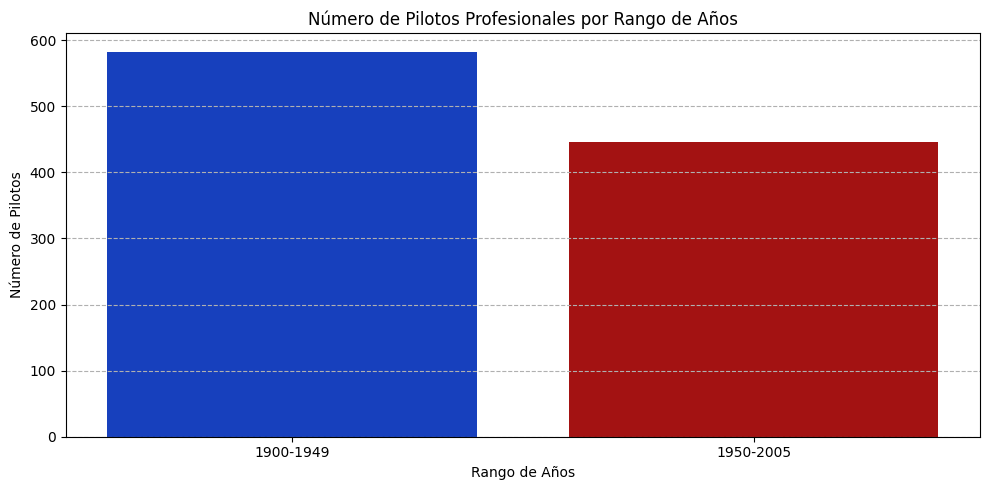

In [126]:
# Crear listas para los datos
years_ranges = ['1900-1949', '1950-2005']
counts = [count_1900_1949, count_1950_2005]

# Definir una paleta de colores
colors = ['#1740bd', '#a31212'] 

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(years_ranges, counts, color=colors)

# Formatear la gráfica
plt.title('Número de Pilotos Profesionales por Rango de Años')
plt.xlabel('Rango de Años')
plt.ylabel('Número de Pilotos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### 3.9 Pilotos por Nacionalidad en la Historia del Automovilismo

In [98]:
# Definir las nacionalidades
nationalities = ['British', 'American', 'Italian', 'French', 'German']

# Crear un diccionario para almacenar los conteos
nationality_counts = {nationality: [] for nationality in nationalities}

# Iterar a través de los años de 1900 a 2005
for year in range(1900, 2006):
    # Filtrar el DataFrame por el año específico
    year_filter = dataset[dataset['dob'].dt.year == year]
    
    # Contar cuántos pilotos hay de cada nacionalidad en ese año
    for nationality in nationalities:
        count = year_filter[year_filter['nationality'] == nationality].shape[0]
        nationality_counts[nationality].append(count)

# Crear un DataFrame a partir del diccionario
counts_df = pd.DataFrame(nationality_counts, index=range(1900, 2006))

# Mostrar el DataFrame con los conteos
counts_df


,British,American,Italian,French,German
1900,1,0,0,0,1
1901,0,0,0,0,0
1902,0,1,0,0,0
1903,0,0,1,0,0
1904,0,0,0,1,0
...,...,...,...,...,...
2001,0,0,0,0,0
2002,0,0,0,0,0
2003,0,0,0,0,0
2004,0,0,0,0,0


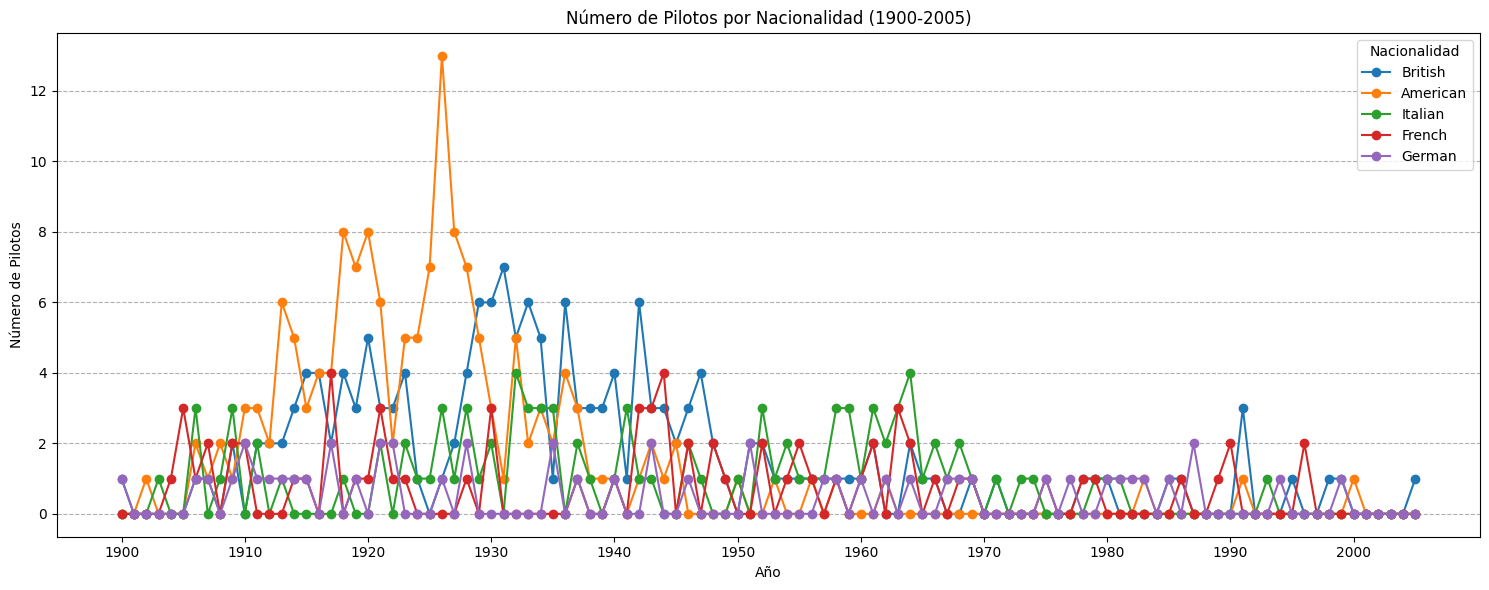

In [99]:
# Crear el gráfico de líneas
plt.figure(figsize=(15, 6))

# Graficar cada nacionalidad
for nationality in nationalities:
    plt.plot(counts_df.index, counts_df[nationality], marker='o', label=nationality)

# Formatear la gráfica
plt.title('Número de Pilotos por Nacionalidad (1900-2005)')
plt.xlabel('Año')
plt.ylabel('Número de Pilotos')
plt.xticks(range(1900, 2006, 10))  
plt.legend(title='Nacionalidad')
plt.grid(axis='y', linestyle='--')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


### 3.10 Pilotos por Nacionalidad de 1950 a 2005 - Origen Formal de F1

In [100]:
# Filtrar el DataFrame por los años 1950 a 2005
filtered_dataset = dataset[(dataset['dob'].dt.year >= 1950) & (dataset['dob'].dt.year <= 2005)]

# Contar las nacionalidades
counts = filtered_dataset['nationality'].value_counts(ascending=False)

# Mostrar los 20 principales
top_counts = counts.head(20)
top_counts


nationality
Italian       43
British       32
French        27
Brazilian     23
German        21
Japanese      16
Spanish        8
American       8
Dutch          8
Austrian       7
Belgian        7
Swiss          7
Finnish        6
Australian     6
Canadian       6
Argentine      5
Russian        4
Irish          4
Portuguese     3
Danish         3
Name: count, dtype: int64

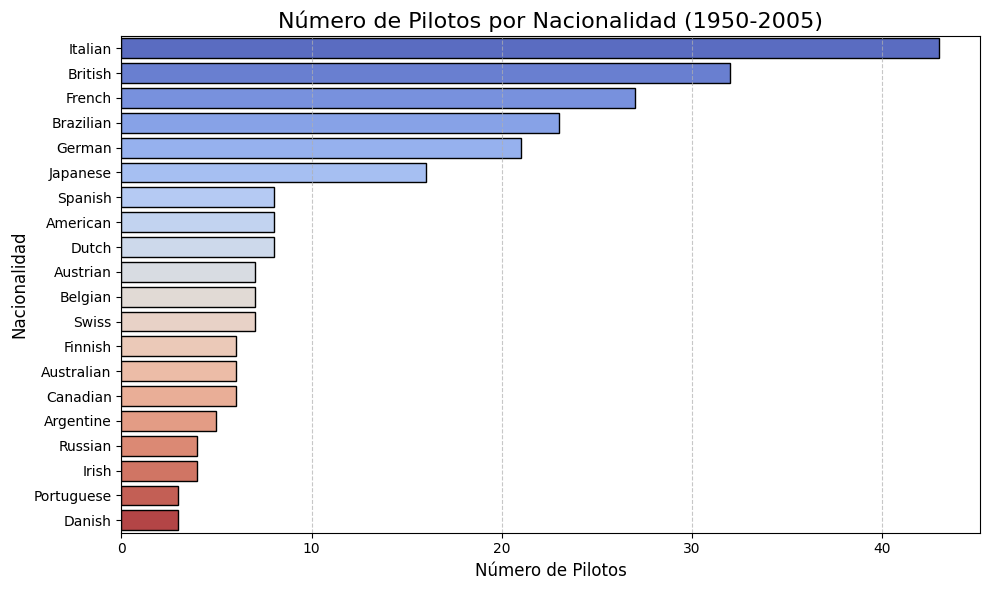

In [101]:
# Crear el gráfico con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y=top_counts.index, x=top_counts.values, palette='coolwarm', edgecolor='black')

# Formato del gráfico
plt.title('Número de Pilotos por Nacionalidad (1950-2005)', fontsize=16)
plt.xlabel('Número de Pilotos', fontsize=12)
plt.ylabel('Nacionalidad', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [102]:
# Definir las nacionalidades
nationalities = ['British', 'Brazilian', 'Italian', 'French', 'German', 'Japanese']

# Crear un diccionario para almacenar los conteos
nationality_counts = {nationality: [] for nationality in nationalities}

# Iterar a través de los años de 1950 a 2005
for year in range(1950, 2006):
    # Filtrar el DataFrame por el año específico
    year_filter = dataset[dataset['dob'].dt.year == year]
    
    # Contar cuántos pilotos hay de cada nacionalidad en ese año
    for nationality in nationalities:
        count = year_filter[year_filter['nationality'] == nationality].shape[0]
        nationality_counts[nationality].append(count)

# Crear un DataFrame a partir del diccionario
counts_df = pd.DataFrame(nationality_counts, index=range(1950, 2006))

# Sumar los resultados de cada nacionalidad para los años seleccionados
total_counts = counts_df.sum()

# Obtener las 5 nacionalidades con mayor número de pilotos
top_nationalities = total_counts.nlargest(5)

# Mostrar el DataFrame con los conteos y las 5 principales nacionalidades
print("Conteos de pilotos por nacionalidad de 1950 a 2005:")
print(counts_df)
print('==========')
print("\nLas 5 principales nacionalidades con mayor número de pilotos:")
print(top_nationalities)


Conteos de pilotos por nacionalidad de 1950 a 2005:
      British  Brazilian  Italian  French  German  Japanese
1950        0          0        1       0       0         0
1951        2          0        0       0       2         1
1952        2          1        3       2       0         0
1953        1          1        1       0       0         1
1954        1          0        2       1       0         0
1955        1          0        1       2       0         1
1956        1          0        1       1       0         0
1957        1          2        1       0       1         0
1958        1          0        3       1       1         0
1959        1          1        3       0       0         0
1960        1          1        1       1       1         1
1961        2          0        3       2       0         0
1962        0          0        2       0       1         0
1963        0          1        3       3       0         2
1964        2          0        4       2       

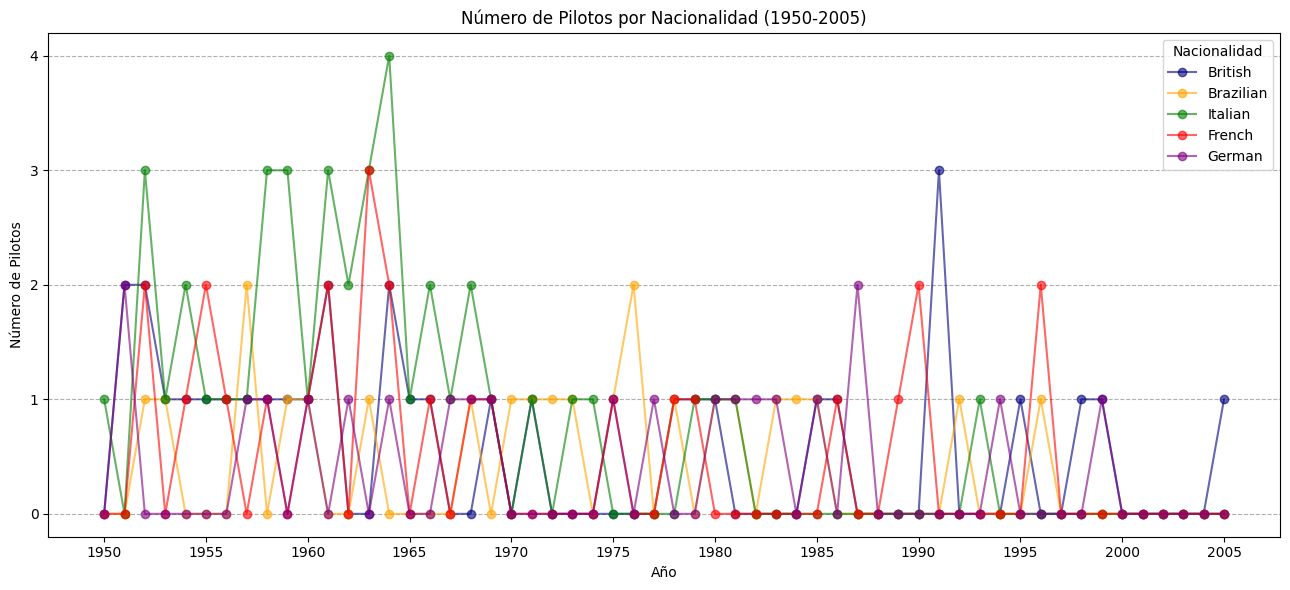

In [103]:
# Crear un gráfico de líneas para las nacionalidades
plt.figure(figsize=(13, 6))

# Colores personalizados para cada nacionalidad
colors = {
    'British': 'navy',
    'Brazilian': 'orange',
    'Italian': 'green',
    'French': 'red',
    'German': 'purple',
}

# Graficar cada nacionalidad con transparencia
for nationality in colors.keys():
    plt.plot(counts_df.index, counts_df[nationality], marker='o', label=nationality, color=colors[nationality], alpha=0.6)

# Formatear la gráfica
plt.title('Número de Pilotos por Nacionalidad (1950-2005)')
plt.xlabel('Año')
plt.ylabel('Número de Pilotos')
plt.xticks(range(1950, 2006, 5))

# Ajustar el eje Y para mostrar solo enteros
plt.yticks(range(0, counts_df.max().max() + 1, 1))  

plt.legend(title='Nacionalidad')
plt.grid(axis='y', linestyle='--')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


### 3.11 Pilotos Británicos en la Historia de la Fórmula 1

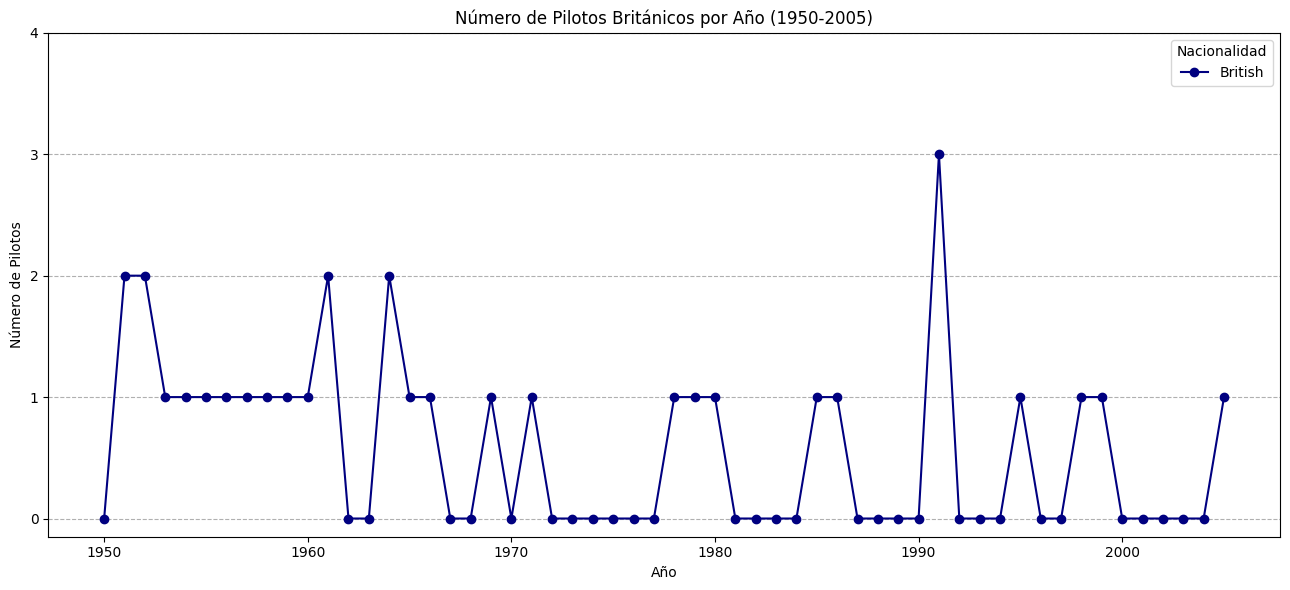

In [123]:
# Crear el gráfico de líneas para pilotos británicos
plt.figure(figsize=(13, 6))

# Graficar solo los pilotos británicos
plt.plot(counts_df.index, counts_df['British'], marker='o', color='navy', label='British')

# Formatear la gráfica
plt.title('Número de Pilotos Británicos por Año (1950-2005)')
plt.xlabel('Año')
plt.ylabel('Número de Pilotos')
plt.xticks(range(1950, 2006, 10))  
plt.legend(title='Nacionalidad')
plt.grid(axis='y', linestyle='--')

# Establecer el eje Y para mostrar solo números enteros
plt.yticks(range(0, counts_df['Italian'].max() + 1))

# Mostrar la gráfica
plt.tight_layout()
plt.show()


### 3.12 Pilotos Brasileños en la Historia de la Fórmula 1

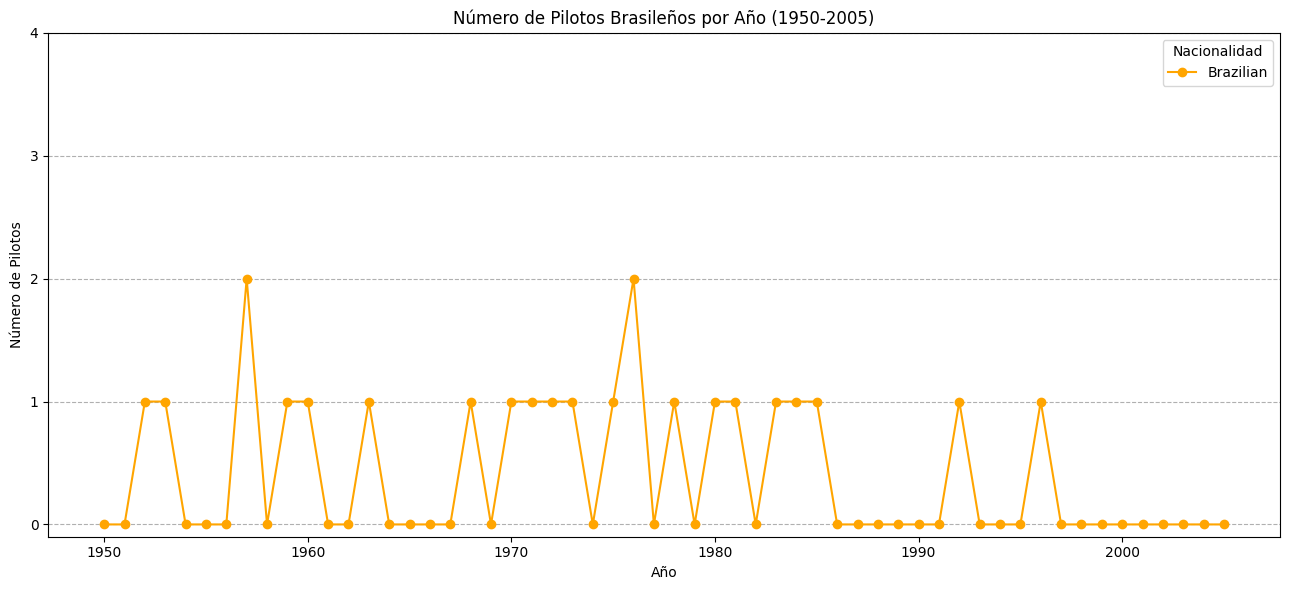

In [122]:
# Crear el gráfico de líneas para pilotos americanos
plt.figure(figsize=(13, 6))

# Graficar solo los pilotos americanos
plt.plot(counts_df.index, counts_df['Brazilian'], marker='o', color='orange', label='Brazilian')

# Formatear la gráfica
plt.title('Número de Pilotos Brasileños por Año (1950-2005)')
plt.xlabel('Año')
plt.ylabel('Número de Pilotos')
plt.xticks(range(1950, 2006, 10))  
plt.legend(title='Nacionalidad')
plt.grid(axis='y', linestyle='--')

# Establecer el eje Y para mostrar solo números enteros
plt.yticks(range(0, counts_df['Italian'].max() + 1))

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### 3.13 Pilotos Italianos en la Historia de la Fórmula 1

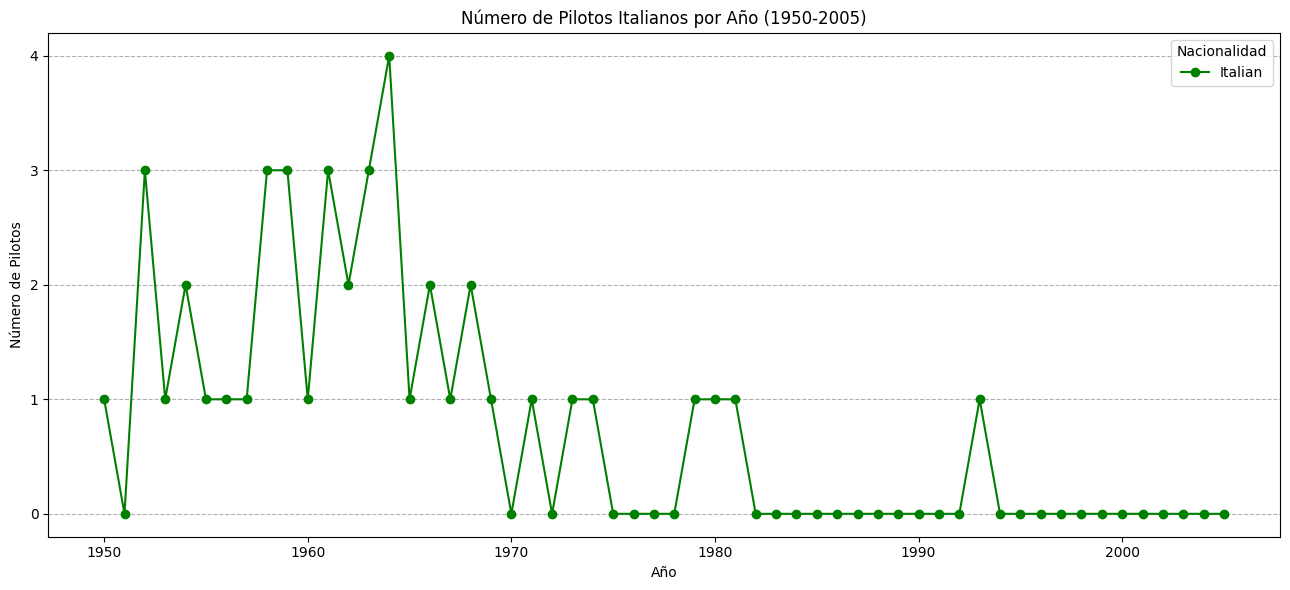

In [118]:
# Crear el gráfico de líneas para pilotos italianos
plt.figure(figsize=(13, 6))

# Graficar solo los pilotos italianos
plt.plot(counts_df.index, counts_df['Italian'], marker='o', color='green', label='Italian')

# Formatear la gráfica
plt.title('Número de Pilotos Italianos por Año (1950-2005)')
plt.xlabel('Año')
plt.ylabel('Número de Pilotos')
plt.xticks(range(1950, 2006, 10)) 
plt.legend(title='Nacionalidad')
plt.grid(axis='y', linestyle='--')

# Establecer el eje Y para mostrar solo números enteros
plt.yticks(range(0, counts_df['Italian'].max() + 1))  

# Mostrar la gráfica
plt.tight_layout()
plt.show()


### 3.14 Pilotos Franceses en la Historia de la Fórmula 1

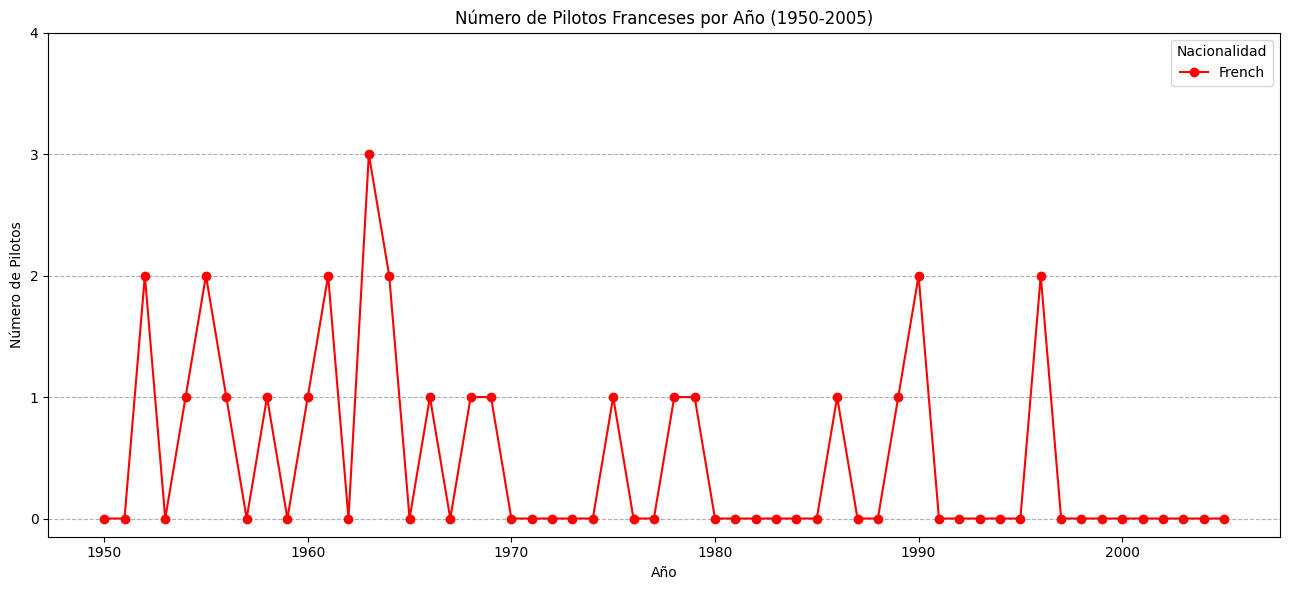

In [124]:
# Crear el gráfico de líneas para pilotos franceses
plt.figure(figsize=(13, 6))

# Graficar solo los pilotos franceses
plt.plot(counts_df.index, counts_df['French'], marker='o', color='red', label='French')

# Formatear la gráfica
plt.title('Número de Pilotos Franceses por Año (1950-2005)')
plt.xlabel('Año')
plt.ylabel('Número de Pilotos')
plt.xticks(range(1950, 2006, 10))  
plt.legend(title='Nacionalidad')
plt.grid(axis='y', linestyle='--')

# Establecer el eje Y para mostrar solo números enteros
plt.yticks(range(0, counts_df['Italian'].max() + 1))  

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### 3.15 Pilotos Alemanes en la Historia de la Fórmula 1

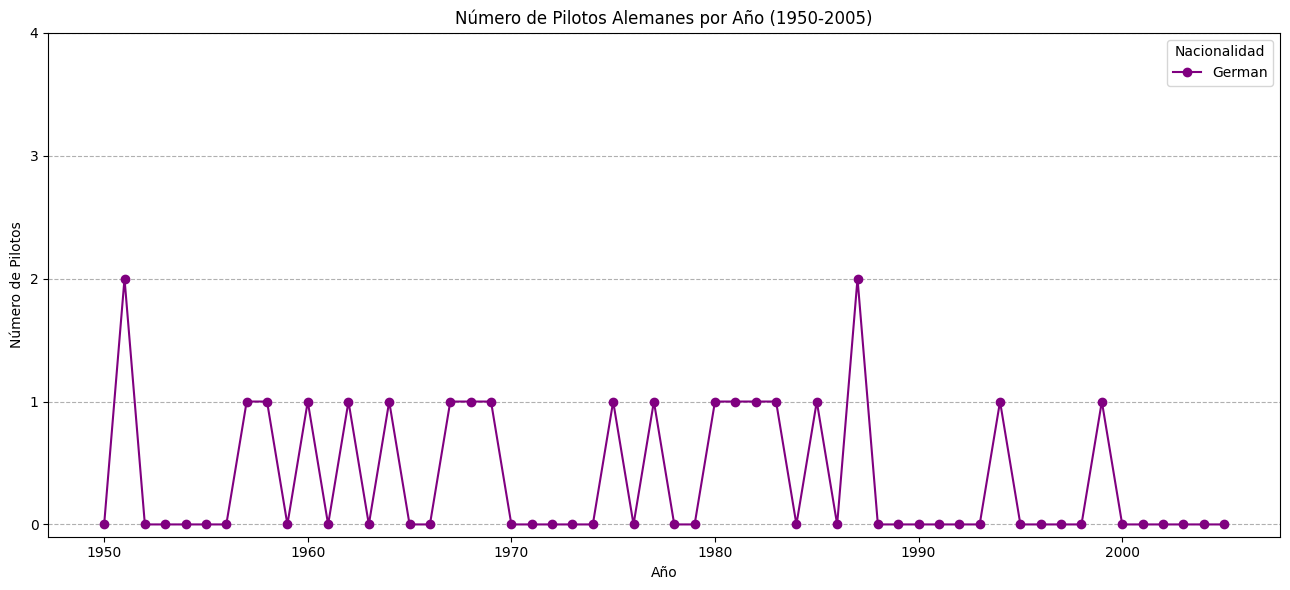

In [125]:
# Crear el gráfico de líneas para pilotos alemanes
plt.figure(figsize=(13, 6))

# Graficar solo los pilotos alemanes
plt.plot(counts_df.index, counts_df['German'], marker='o', color='purple', label='German')

# Formatear la gráfica
plt.title('Número de Pilotos Alemanes por Año (1950-2005)')
plt.xlabel('Año')
plt.ylabel('Número de Pilotos')
plt.xticks(range(1950, 2006, 10))  
plt.legend(title='Nacionalidad')
plt.grid(axis='y', linestyle='--')

# Establecer el eje Y para mostrar solo números enteros
plt.yticks(range(0, counts_df['Italian'].max() + 1))  

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## 4. CONCLUSIONES

1. **Evolución de la Fórmula 1**:
   - Es interesante notar que, aunque la Fórmula 1 se formalizó en 1950, la participación de pilotos de distintas nacionalidades ya era notable antes de esta fecha. Esto sugiere que el automovilismo ya tenía un desarrollo previo significativo, y que la transición a la Fórmula 1 fue un proceso natural.

2. **Dominio Británico y Americano Previo a la F1**:
   - Previo a la formalización de la Fórmula 1, los pilotos británicos y americanos han dominado el Automovilismo, con 166 y 158 pilotos, respectivamente. Esto sugiere que estos países han tenido no solo una tradición automovilística sólida, sino también una infraestructura y un apoyo organizativo que han fomentado la formación y el desarrollo de pilotos de alta calidad.

3. **Éxito Italiano en las Décadas de 1950 a 1970**:
   - La notable cantidad de pilotos italianos que llegaron a la Fórmula 1 entre 1950 y 1970 (con un total de 99) refleja la fortaleza del automovilismo en Italia durante ese periodo. Este fenómeno podría estar relacionado con la presencia de equipos exitosos, como Ferrari, y un enfoque cultural en la ingeniería y el diseño automotriz.

4. **Presencia Constante de Pilotos Alemanes**:
   - La tendencia constante de pilotos alemanes desde 1950 hasta 1990, aunque menos sobresaliente, sugiere una base estable de talentos que se han integrado en la Fórmula 1. Sin embargo, la caída en la representación alemana para pilotos nacidos después de 1988 podría indicar cambios en el deporte o una menor inversión en el desarrollo de nuevos talentos en ese país.

5. **Homogeneización en la Participación Internacional**:
   - Desde 1970, se observa que muchos países (excluyendo a los americanos e italianos) tienen una tendencia similar en la cantidad de pilotos que llegan a la Fórmula 1, con 1 o 2 representantes por lo general. Esto podría indicar que el automovilismo se ha vuelto más globalizado, aunque los británicos siguen manteniendo el liderato con mayor número de pilotos en la máxima categoría, podemos observar muchas otras nacionalidades incursionando en la F1.

6. **Desafíos Actuales y Futuros**:
   - A medida que la Fórmula 1 avanza, enfrenta desafíos como la sostenibilidad, la diversidad en el deporte y el aumento de la competencia global. La evolución de las políticas de inclusión y la promoción de jóvenes talentos de diferentes nacionalidades serán fundamentales para el futuro del deporte.

7. **Influencia de la Cultura Automovilística**:
   - La cultura automovilística de cada país juega un papel crítico en el desarrollo de sus pilotos. La formación de academias de pilotos y la inversión en tecnología y carreras son factores que pueden impulsar el éxito de las futuras generaciones de corredores. Observamos países históricos que normalmente habían aportado unos cuantos pilotos a la categoría, sin embargo, pensamos que el nivel de exigencia y popularidad está en un grado máximo y lamentablemente únicamente hay 20 asientos disponibles para jóvenes pilotos.

8. **Control Europeo**:
   - Definitivamente tanto en la historia previa del automovilismo como a partir del origen y organización de la Fórmula 1, este deporte ha sido claramente dominado por paises del continente Europeo, como Italia, Reino Unido, Francia, Alemania, España o Países Bajos por mencionar algunos. También el continente Americano tiene una presencia considerable con países como Brazil, Argentina, Canadá, o Estados Unidos, aunque este último ha disminuido considerablemente su aportación de pilotos a la categoría en los últimos años. Y por último, tanto Asia como Oceanía tienen presencia en Fórmula 1 principalmente con países como Japón y Australia respectivamente.  

